ECE 4580 Digital Image Processing HW4 - Hiten Kothari

In [9]:
from google.colab import drive
from skimage import io,data,restoration,filters,color
from scipy import signal
import numpy as np
import matplotlib.pyplot as plt
import cv2

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Part I : Average Gradient vs Gaussian Sigma

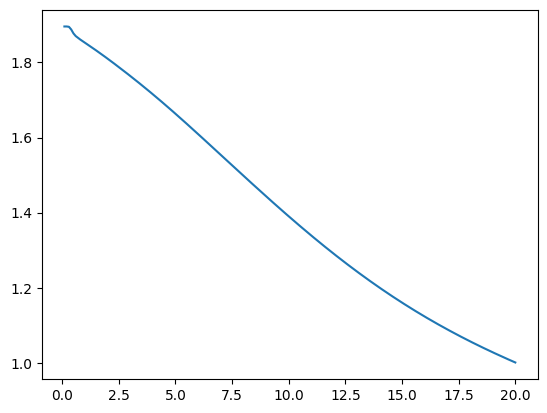

In [10]:
image = io.imread("/content/drive/MyDrive/Images/USAF-1951.png") #loading image
grayscaled = np.mean(image,axis=2,keepdims=False) #grayscaling image

# plt.imshow(grayscaled,cmap="gray")
# plt.show()

sigma = 0
iteration = 200
sobel_x = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
sobel_y = sobel_x.T
avg_gradient = []
sigma_range=[]

for i in range(iteration):
  sigma = sigma+0.1
  blurred = filters.gaussian(grayscaled,sigma)
  grad_x = signal.convolve2d(blurred, sobel_x, boundary='symm', mode='same')
  grad_y = signal.convolve2d(blurred, sobel_y, boundary='symm', mode='same')
  gradient = np.sqrt((np.square(grad_x)+np.square(grad_y)))
  sigma_range.append(sigma)
  avg_gradient.append(np.mean(gradient))

plt.plot(sigma_range,np.log10(avg_gradient))
plt.show()

# plt.plot(sigma_range,avg_gradient)
# plt.show()



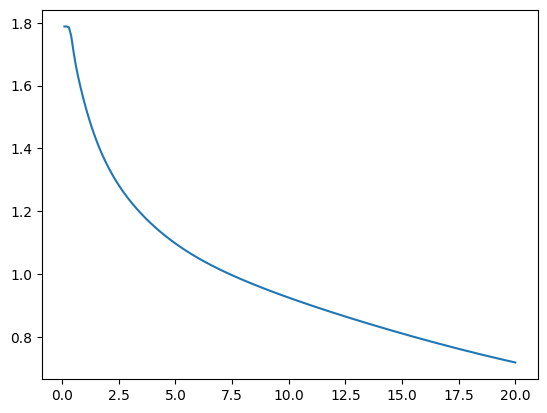

In [11]:
image = io.imread("/content/drive/MyDrive/Images/Chartres-Cathedral.png")
grayscaled = np.mean(image,axis=2,keepdims=False)

# plt.imshow(grayscaled,cmap="gray")
# plt.show()

sigma = 0
iteration = 200
sobel_x = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
sobel_y = sobel_x.T
avg_gradient = []
sigma_range=[]

for i in range(iteration):
  sigma = sigma+0.1
  blurred = filters.gaussian(grayscaled,sigma)
  grad_x = signal.convolve2d(blurred, sobel_x, boundary='symm', mode='same')
  grad_y = signal.convolve2d(blurred, sobel_y, boundary='symm', mode='same')
  gradient = np.sqrt((np.square(grad_x)+np.square(grad_y)))
  sigma_range.append(sigma)
  avg_gradient.append(np.mean(gradient))

plt.plot(sigma_range,np.log10(avg_gradient))
plt.show()

# plt.plot(sigma_range,avg_gradient)
# plt.show()

Gaussian Filter is a low-pass filter. It performs smoothening/blurring on the image it is applied to. The higher the value of sigma, the higher is the blurring applied. Edges in an image are high-frequency component since they have a sharp change in intensity. Applying gaussian filter to the image will blur out these sharp edges. When we take gradient magnitude of these images, it gives an edge image output where only the edges are focused and brightened. If the image is blurred, the intensity and number of edges detected both will be low. Thus, the average gradient value of the entire image will also be low. As you can see from both the plots above, the average gradient intensity values shows a decreasing trend with increase in sigma. After sigma becomes large enough, the edges reach saturation and gives similar intensity for higher sigma. Since 'USAF-1951' image has more distinct black and white objects and sharp edges, the intensity plot descends slower. As for 'Chartres-Cathedral' image, the edges are not sharp and distinct to begin with, so the plot dips faster till it starts reaching saturation. In both the graphs, after sigma=0.3 there is a big dip, I think this is because till sigma=0.3, the central element of filter has 98% weightage. As sigma increases, the weightage decreases by a high margin (for sigma=0.4 it is 84% and for sigma=0.5 it is 61% and so on). This was observed by applying gaussian filter on a a test array, shown in Appendix 1.

PART II: FOURIER TRANSFORM

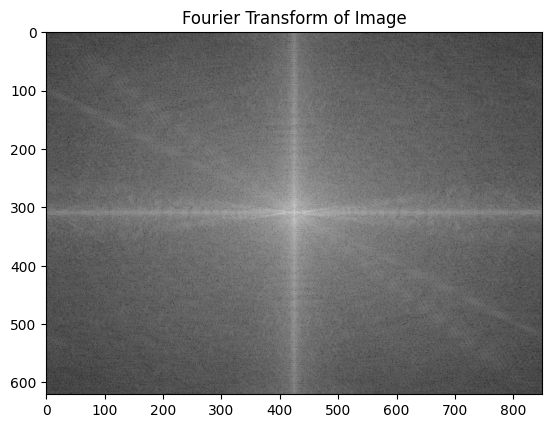

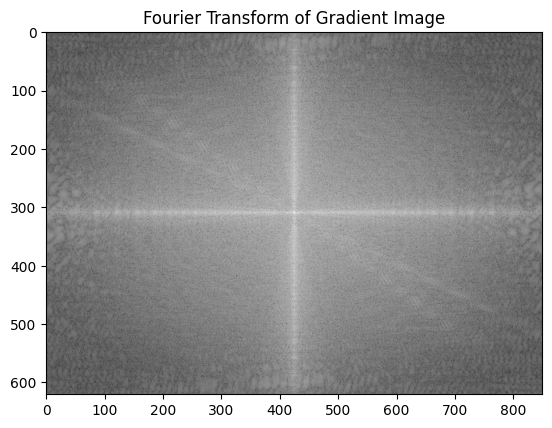

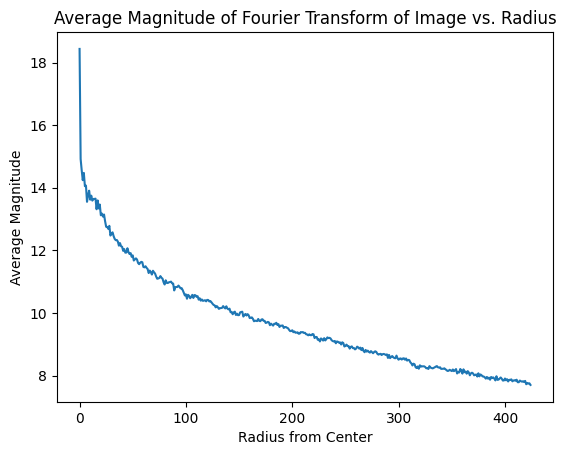

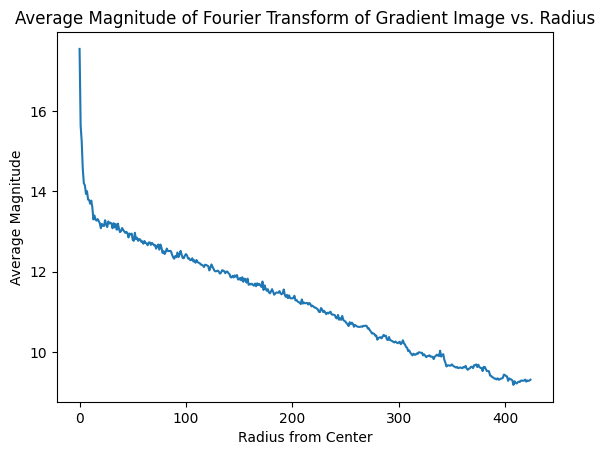

In [12]:
image = io.imread("/content/drive/MyDrive/Images/USAF-1951.png")
grayscaled = np.mean(image,axis=2,keepdims=False)

sobel_x = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
sobel_y = sobel_x.T

fft_image = np.fft.fft2(grayscaled)
fft_image = np.fft.fftshift(fft_image)
mag_fft_image = abs(fft_image)

grad_x = signal.convolve2d(grayscaled, sobel_x, boundary='symm', mode='same')
grad_y = signal.convolve2d(grayscaled, sobel_y, boundary='symm', mode='same')
grad = np.sqrt((np.square(grad_x)+np.square(grad_y)))

fft_gradimage = np.fft.fft2(grad)
fft_gradimage = np.fft.fftshift(fft_gradimage)
mag_fft_gradimage = abs(fft_gradimage)

mag_fft_image_log = np.log10(mag_fft_image)
mag_fft_gradimage_log = np.log10(mag_fft_gradimage)

plt.imshow(mag_fft_image_log,cmap='gray')
plt.title('Fourier Transform of Image')
plt.show()

plt.imshow(mag_fft_gradimage_log,cmap='gray')
plt.title('Fourier Transform of Gradient Image')
plt.show()

cols, rows = grayscaled.shape
freq_row = np.fft.fftshift(np.fft.fftfreq(rows, 1/rows))
freq_col = np.fft.fftshift(np.fft.fftfreq(cols, 1/cols))
freq_row, freq_col = np.meshgrid(freq_row, freq_col)
freq_magnitude = np.sqrt(freq_row**2 + freq_col**2)
max_radius = max(rows, cols) // 2

average_magnitude = np.zeros(max_radius)
average_gradmagnitude = np.zeros(max_radius)
for r in range(max_radius):
    mask = (freq_magnitude >= r) & (freq_magnitude < r + 1)
    average_magnitude[r] = np.mean(mag_fft_image[mask])
    average_gradmagnitude[r] = np.mean(mag_fft_gradimage[mask])

# Plot the average magnitude as a function of radius
plt.plot(range(max_radius), np.log(average_magnitude))
plt.xlabel('Radius from Center')
plt.ylabel('Average Magnitude')
plt.title('Average Magnitude of Fourier Transform of Image vs. Radius')
plt.show()

plt.plot(range(max_radius), np.log(average_gradmagnitude))
plt.xlabel('Radius from Center')
plt.ylabel('Average Magnitude')
plt.title('Average Magnitude of Fourier Transform of Gradient Image vs. Radius')
plt.show()



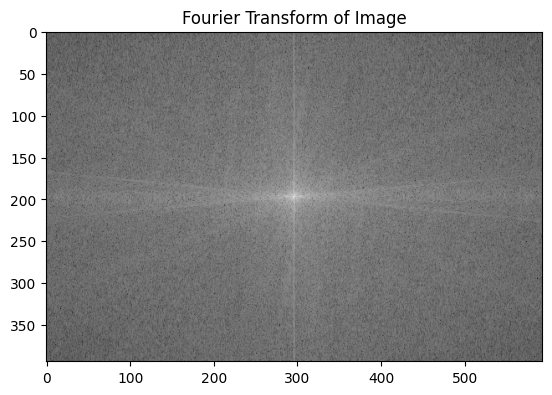

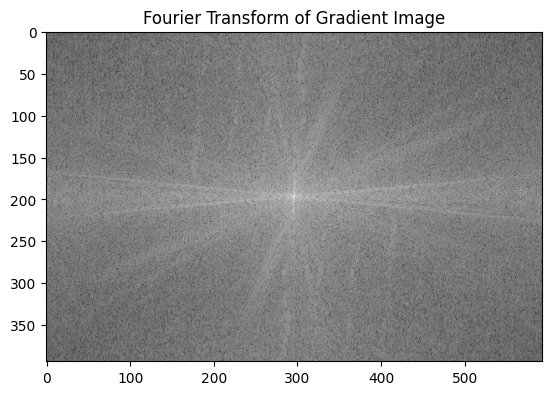

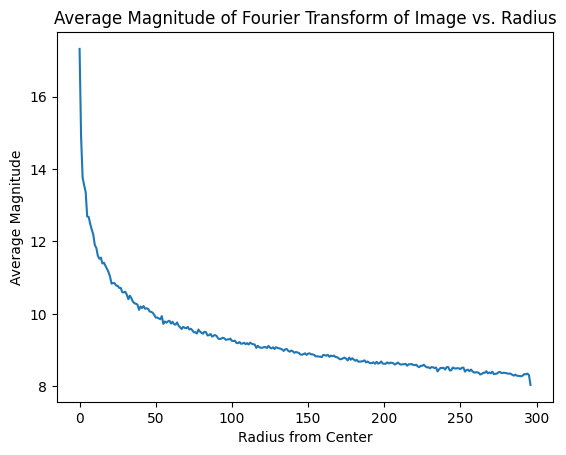

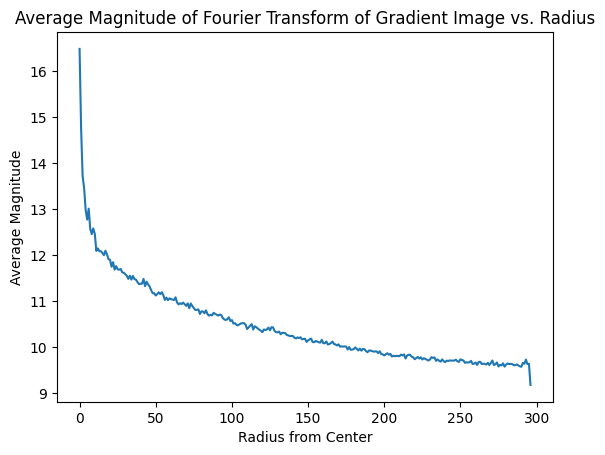

In [13]:
image = io.imread("/content/drive/MyDrive/Images/Chartres-Cathedral.png")
grayscaled = np.mean(image,axis=2,keepdims=False)

sobel_x = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
sobel_y = sobel_x.T

fft_image = np.fft.fft2(grayscaled)
fft_image = np.fft.fftshift(fft_image)
mag_fft_image = abs(fft_image)

grad_x = signal.convolve2d(grayscaled, sobel_x, boundary='symm', mode='same')
grad_y = signal.convolve2d(grayscaled, sobel_y, boundary='symm', mode='same')
grad = np.sqrt((np.square(grad_x)+np.square(grad_y)))

fft_gradimage = np.fft.fft2(grad)
fft_gradimage = np.fft.fftshift(fft_gradimage)
mag_fft_gradimage = abs(fft_gradimage)

mag_fft_image_log = np.log10(mag_fft_image)
mag_fft_gradimage_log = np.log10(mag_fft_gradimage)

plt.imshow(mag_fft_image_log,cmap='gray')
plt.title('Fourier Transform of Image')
plt.show()

plt.imshow(mag_fft_gradimage_log,cmap='gray')
plt.title('Fourier Transform of Gradient Image')
plt.show()

cols, rows = grayscaled.shape
freq_row = np.fft.fftshift(np.fft.fftfreq(rows, 1/rows))
freq_col = np.fft.fftshift(np.fft.fftfreq(cols, 1/cols))
freq_row, freq_col = np.meshgrid(freq_row, freq_col)
freq_magnitude = np.sqrt(freq_row**2 + freq_col**2)
max_radius = max(rows, cols) // 2

average_magnitude = np.zeros(max_radius+1)
average_gradmagnitude = np.zeros(max_radius+1)
for r in range(max_radius):
    mask = (freq_magnitude >= r) & (freq_magnitude < r + 1)
    average_magnitude[r] = np.mean(mag_fft_image[mask])
    average_gradmagnitude[r] = np.mean(mag_fft_gradimage[mask])


average_magnitude[max_radius] = np.mean(mag_fft_image[freq_magnitude >= max_radius])
average_gradmagnitude[max_radius] = np.mean(mag_fft_gradimage[freq_magnitude >= max_radius])

# Plot the average magnitude as a function of radius
plt.plot(range(max_radius+1), np.log(average_magnitude))
plt.xlabel('Radius from Center')
plt.ylabel('Average Magnitude')
plt.title('Average Magnitude of Fourier Transform of Image vs. Radius')
plt.show()

plt.plot(range(max_radius+1), np.log(average_gradmagnitude))
plt.xlabel('Radius from Center')
plt.ylabel('Average Magnitude')
plt.title('Average Magnitude of Fourier Transform of Gradient Image vs. Radius')
plt.show()

Taking a fourier transform of an image converts the content of the image to its spatial frequency. Since, the fourier images are shifted to make it centered, the central component is DC frequency and then then frequency increases outwards. As you can see in both the images, the central pixel is the brightest owing to the zero frequency or constant areas of the original images. The gradient image has a lesser magnitude since there are more distince edges in those images as compared to original image. As the radius increases, the intensity decreases because there are not much high frequency component in both of the images. Comparing the images with each other, 'USAF-1951' has more powerful vertical and horizontal intensity in its fourier image owing to the strong vertical and horizontal edges in the original image. The 'Chartres-Cathedral' fourier image has some distinct slant lines which are because of the slant slopes of the roofs of the structure in the image. Note that since the plot is in log scale, the vertical and horizontal as well as other lines look quite distinct. The actual intensity values of those elements are very small when compared to the intensity at DC pixel.

Appendix 1: Gaussian Analysis

In [14]:
a = np.zeros((3, 3))
a[1, 1] = 1
b = filters.gaussian(a, sigma=0.1)  # mild smoothing
print(b)
c = filters.gaussian(a, sigma=0.2)  # more smoothing
print(c)
d = filters.gaussian(a, sigma=0.3)  # mild smoothing
print(d)
e = filters.gaussian(a, sigma=0.4)  # more smoothing
print(e)
f = filters.gaussian(a, sigma=0.5)  # more smoothing
print(f)

[[0. 0. 0.]
 [0. 1. 0.]
 [0. 0. 0.]]
[[1.38877368e-11 3.72659762e-06 1.38877368e-11]
 [3.72659762e-06 9.99985094e-01 3.72659762e-06]
 [1.38877368e-11 3.72659762e-06 1.38877368e-11]]
[[1.47168816e-05 3.80682504e-03 1.47168816e-05]
 [3.80682504e-03 9.84713832e-01 3.80682504e-03]
 [1.47168816e-05 3.80682504e-03 1.47168816e-05]]
[[0.00163116 0.03712502 0.00163116]
 [0.03712502 0.84496158 0.03712502]
 [0.00163116 0.03712502 0.00163116]]
[[0.01133177 0.08373106 0.01133177]
 [0.08373106 0.61869351 0.08373106]
 [0.01133177 0.08373106 0.01133177]]


Creating a PDF version of your current notebook

In [15]:
#The following two installation steps are needed to generate a PDF version of the notebook
#(These lines are needed within Google Colab, but are not needed within a local version of Jupyter notebook)
!apt-get -qq install texlive texlive-xetex texlive-latex-extra pandoc
!pip install --quiet pypandoc

In [16]:
# TO DO: Provide the full path to your Jupyter notebook file
!jupyter nbconvert --to PDF "/content/drive/MyDrive/Colab Notebooks/ECE4580_HW4.ipynb"

[NbConvertApp] Converting notebook /content/drive/MyDrive/Colab Notebooks/ECE4580_HW4.ipynb to PDF
[NbConvertApp] Support files will be in ECE4580_HW4_files/
[NbConvertApp] Making directory ./ECE4580_HW4_files
[NbConvertApp] Making directory ./ECE4580_HW4_files
[NbConvertApp] Making directory ./ECE4580_HW4_files
[NbConvertApp] Making directory ./ECE4580_HW4_files
[NbConvertApp] Making directory ./ECE4580_HW4_files
[NbConvertApp] Making directory ./ECE4580_HW4_files
[NbConvertApp] Making directory ./ECE4580_HW4_files
[NbConvertApp] Making directory ./ECE4580_HW4_files
[NbConvertApp] Making directory ./ECE4580_HW4_files
[NbConvertApp] Making directory ./ECE4580_HW4_files
[NbConvertApp] Writing 50495 bytes to notebook.tex
[NbConvertApp] Building PDF
[NbConvertApp] Running xelatex 3 times: ['xelatex', 'notebook.tex', '-quiet']
[NbConvertApp] Running bibtex 1 time: ['bibtex', 'notebook']
[NbConvertApp] WARNING | bibtex had problems, most likely because there were no citations
[NbConvertApp]